<a href="https://colab.research.google.com/github/mishraraaj/Bike-Sharing-Demand-Prediction/blob/main/raaj_mishra_Team_2_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [18]:
working_dir='/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/'
df=pd.read_csv(working_dir+'Copy of SeoulBikeData.csv', encoding="cp1252")

In [19]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [20]:
df['Date']

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8760, dtype: object

In [21]:
df['Date']=pd.to_datetime(df['Date'])


In [22]:
df['Year']=df['Date'].dt.year

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


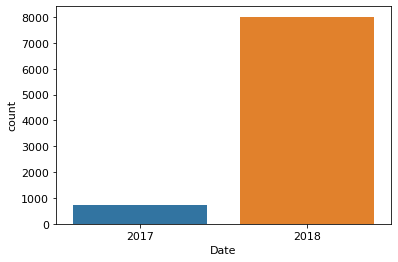

In [23]:
sns.countplot(df['Date'].dt.year)

In [24]:
df['Month']=df['Date'].dt.month

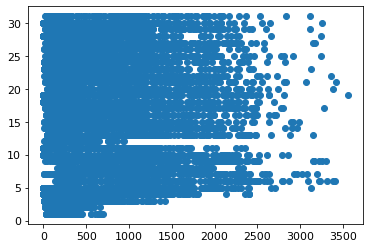

In [25]:

plt.scatter(df['Rented Bike Count'],df['Date'].dt.day)

In [26]:
df['Day']=df['Date'].dt.day

In [27]:
df=df.drop(columns=["Date"])

<Figure size 1440x1080 with 0 Axes>

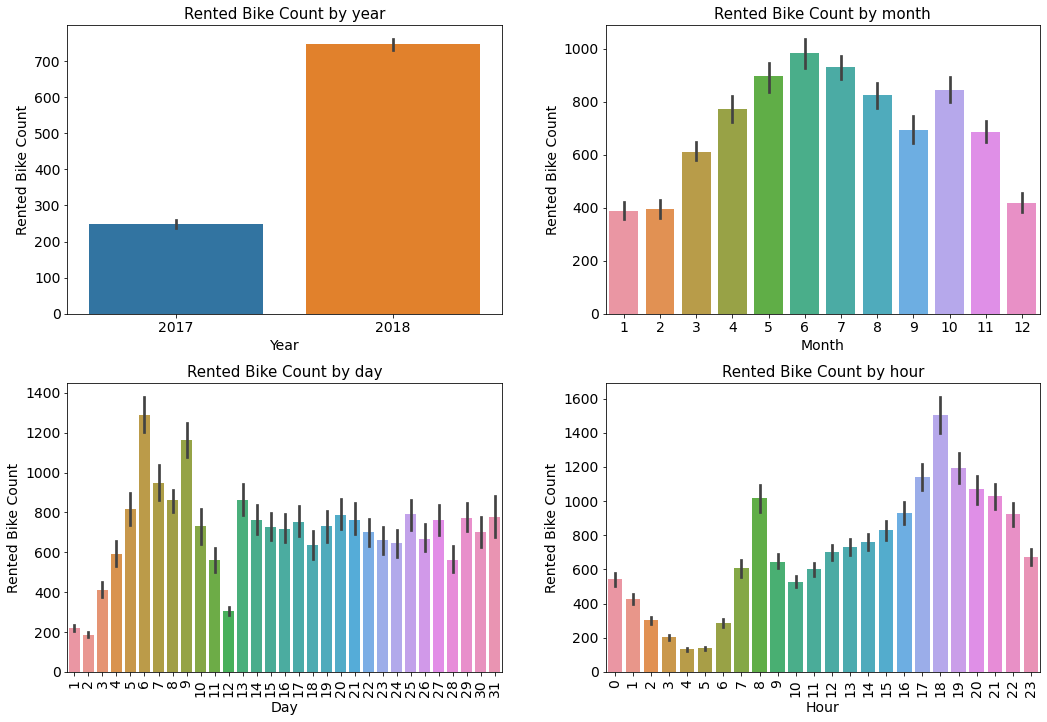

In [28]:
# Step 1 : Prepare m rows n columns Figure
plt.figure(figsize=(20,15))
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # Make Figure in 3rows 2columns

plt.tight_layout(0.1) # Padding between the graphs
figure.set_size_inches(15, 10) # Set total Figure size


sns.barplot(x='Year', y='Rented Bike Count', data=df, ax=axes[0, 0])
sns.barplot(x='Month', y='Rented Bike Count', data=df, ax=axes[0, 1])
sns.barplot(x='Day', y='Rented Bike Count', data=df, ax=axes[1, 0])
sns.barplot(x='Hour', y='Rented Bike Count', data=df, ax=axes[1, 1])


# Step 3: Detailed Settings
# 3.1 Set subplots' title
axes[0, 0].set(title='Rented Bike Count by year')
axes[0, 1].set(title='Rented Bike Count by month')
axes[1, 0].set(title='Rented Bike Count by day')
axes[1, 1].set(title='Rented Bike Count by hour')

# 3.2 Rotate 90 degrees of the x-axis labels of the subplots in row 1
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

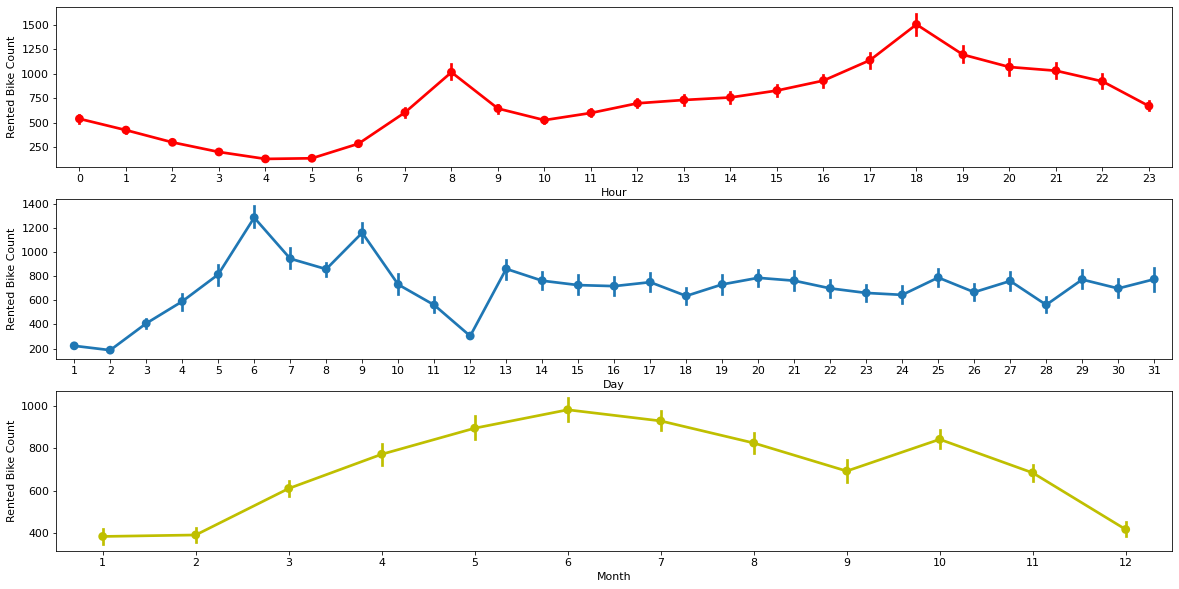

In [29]:
mpl.rc('font', size=11)

figure, axes = plt.subplots(nrows=3,figsize=(20,10))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',color='r',ax=axes[0])
sns.pointplot(data=df,x='Day',y='Rented Bike Count',ax=axes[1])
sns.pointplot(data=df,x='Month',y='Rented Bike Count',color='y',ax=axes[2])

There Is Rise In the Mid quarter of the year , and Again a rise in the 10th month , but People donot prefer bikes in winter


So the day will not affect No of bikes that are being rented

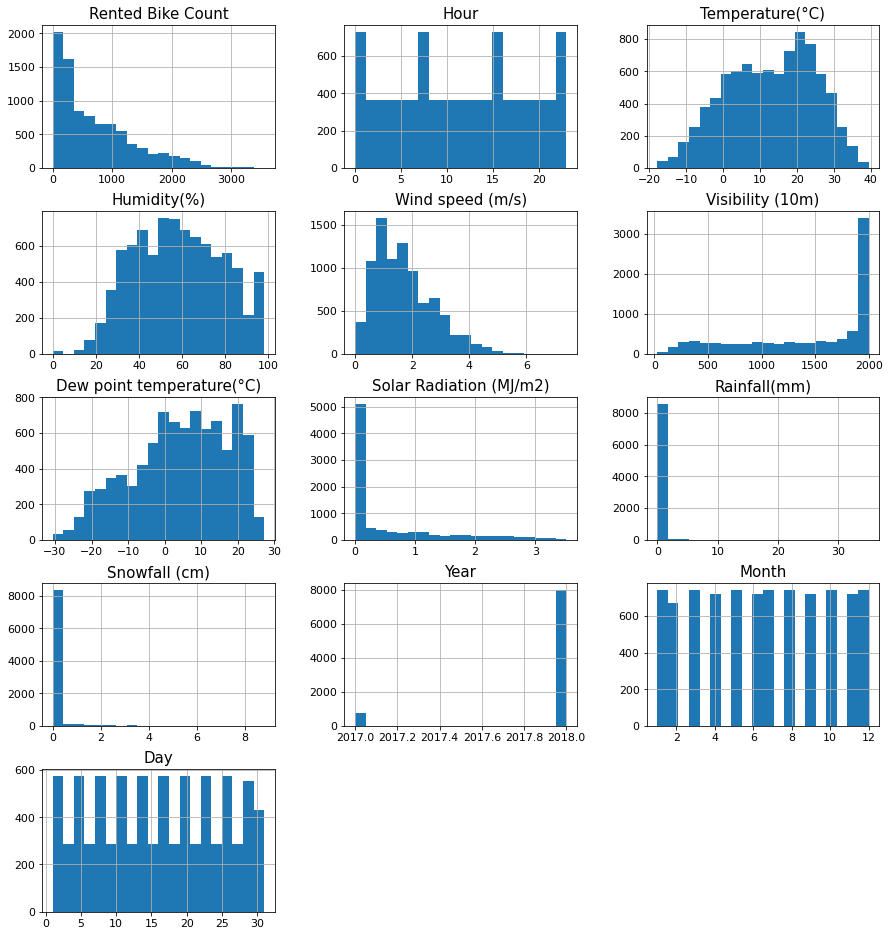

In [30]:
df.hist(bins=20,figsize=(15,30),layout=(9,3))
plt.show()

Rainfall and snow fall are highly Right Skewed high rainfall and high Snow fall is lesws likely to occur we can see there trend with the bikes rented

TREND FOR DEPENDENT VARIABLE

In [31]:
df=df[df['Functioning Day']=='Yes']

In [32]:
df=df.drop(columns=['Functioning Day'])

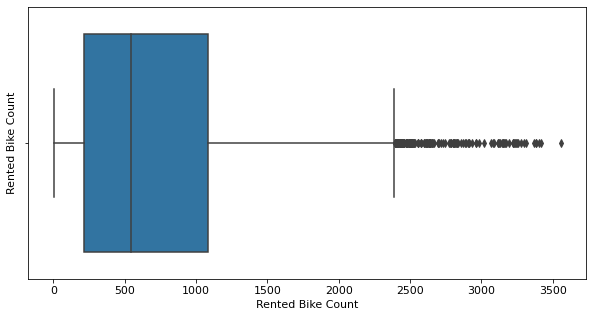

In [33]:

plt.figure(figsize=(10,5))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

This Shows presense of outliers on Right side


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


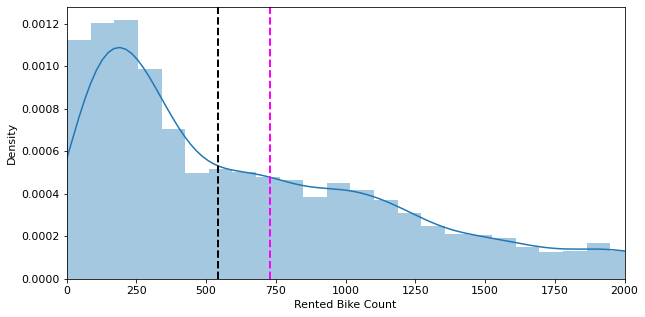

In [34]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True)
ax.axvline(np.mean(df['Rented Bike Count']), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

In [35]:
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float("nan")
    return int(round(x))


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


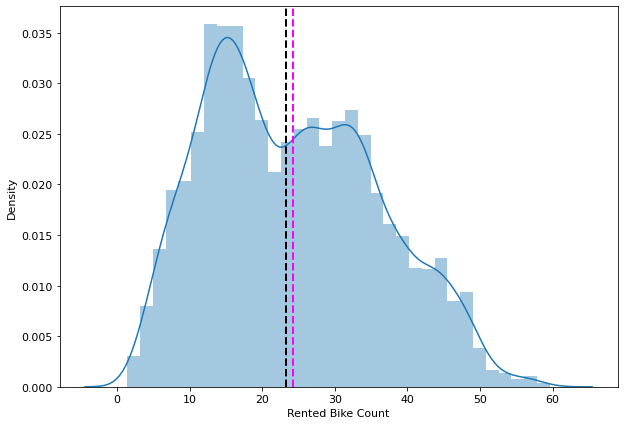

In [36]:
plt.figure(figsize=(10,7))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']))
ax.axvline(np.mean(np.sqrt(df['Rented Bike Count'])), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


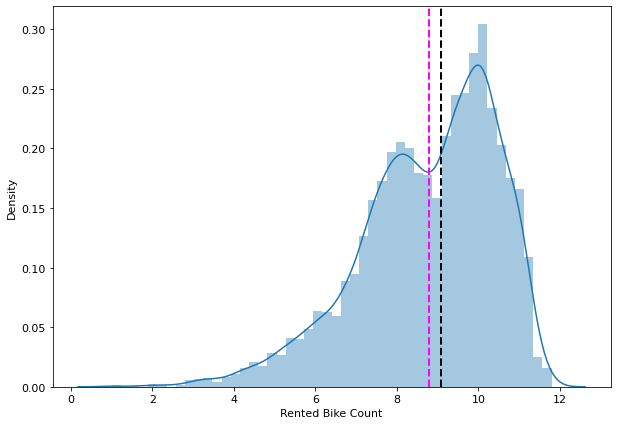

In [37]:
plt.figure(figsize=(10,7))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.log2(df['Rented Bike Count']))
ax.axvline(np.mean(np.log2(df['Rented Bike Count'])), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.log2(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

So we should Take Square root of Y to make it normally distributed

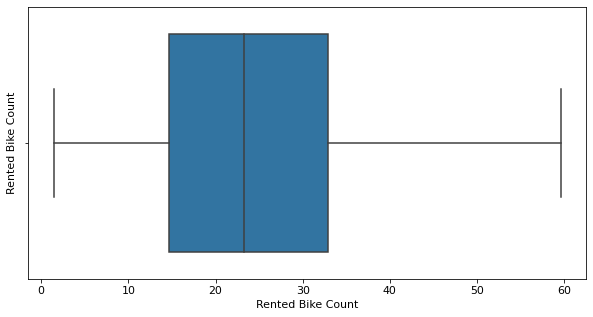

In [38]:

plt.figure(figsize=(10,5))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

## **categorical_variables**

In [39]:
categorical_variables=list(set(df.columns)-set(df.describe().columns))   #categorical_variables

In [40]:
categorical_variables

['Seasons', 'Holiday']

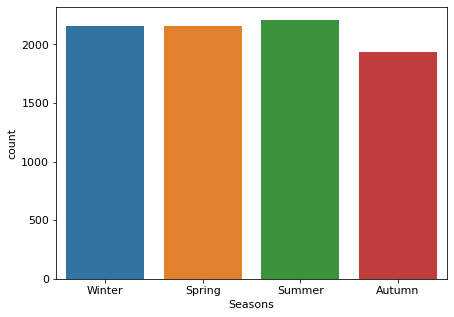

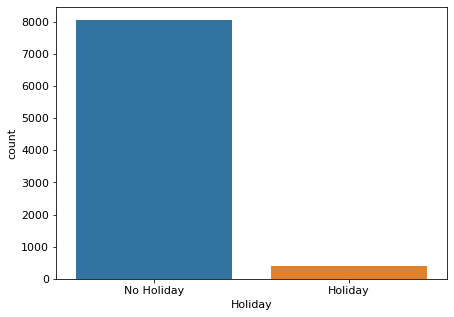

In [41]:
for column in categorical_variables:
  if df[column].nunique() < 14:
    plt.figure(figsize=(7,5)) 
    sns.countplot(x=column,data=df[categorical_variables])
    #plt.legend()
    plt.show()

BarPlot of categorical variables with dependent variable

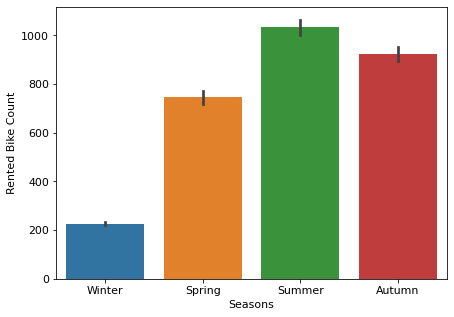

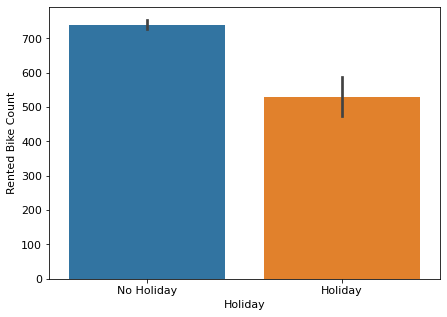

In [42]:

for column in categorical_variables:
  if df[column].nunique() < 14:
    plt.figure(figsize=(7,5)) 
    sns.barplot(x=column,y='Rented Bike Count',data=df)
    #plt.legend()
    plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [44]:
df[categorical_variables]=df[categorical_variables].apply(lambda X: encode.fit_transform(X))

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Seasons                    8465 non-null   int64  
 11  Holiday                    8465 non-null   int64  
 12  Year                       8465 non-null   int64  
 13  Month                      8465 non-null   int64

## Correlation Trend

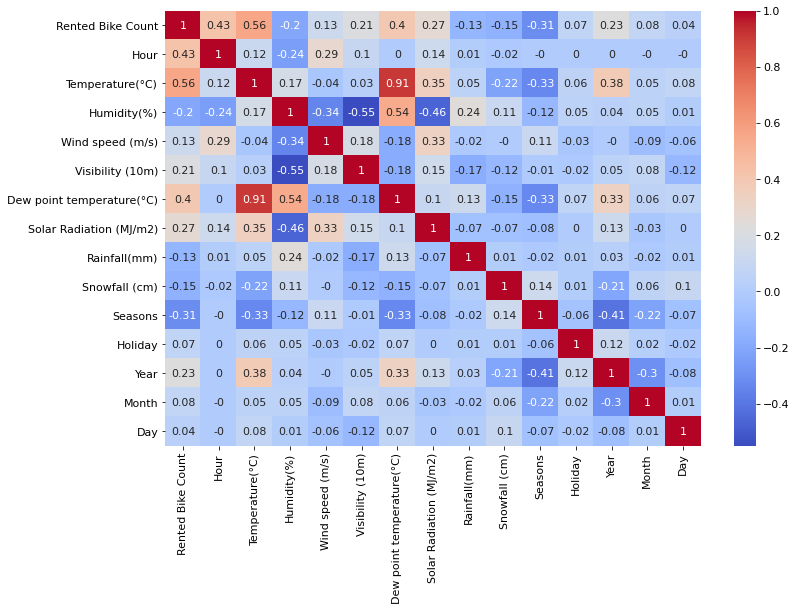

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2),cmap='coolwarm',annot=True)

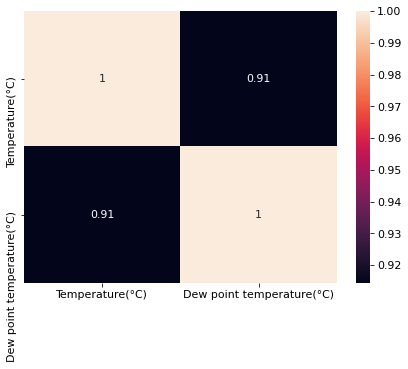

In [47]:
plt.figure(figsize=(7,5))
sns.heatmap(df[["Temperature(°C)",'Dew point temperature(°C)']].corr(),annot=True)

The dew point is the temperature at which air is saturated with water vapor, which is the gaseous state of water.

When air has reached the dew-point temperature at a particular pressure, the water vapor in the air is in equilibrium with liquid water, meaning water vapor is condensing at the same rate at which liquid water is evaporating.

Below the dew point, liquid water will begin to condense on solid surfaces (such as blades of grass) or around solid particles in the atmosphere (such as dust or salt), forming clouds or fog.

Dew point is closely linked to relative humidity, which is the ratio of the pressure of water vapor in a parcel of air relative to the saturation pressure of water vapor in that same parcel of air at a specific temperature. Relative humidity (RH) is expressed as a percentage.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Seasons                    8465 non-null   int64  
 11  Holiday                    8465 non-null   int64  
 12  Year                       8465 non-null   int64  
 13  Month                      8465 non-null   int64

## Check For Multicollinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [50]:
calc_vif(df.drop(columns=['Rented Bike Count']))

,variables,VIF
0,Hour,4.450696
1,Temperature(°C),187.476125
2,Humidity(%),184.453258
3,Wind speed (m/s),4.889265
4,Visibility (10m),10.751833
5,Dew point temperature(°C),127.534127
6,Solar Radiation (MJ/m2),2.891569
7,Rainfall(mm),1.104359
8,Snowfall (cm),1.170954
9,Seasons,3.606545


In [51]:
calc_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)']))

,variables,VIF
0,Hour,4.440921
1,Temperature(°C),3.702601
2,Humidity(%),23.615888
3,Wind speed (m/s),4.880791
4,Visibility (10m),10.684605
5,Solar Radiation (MJ/m2),2.749961
6,Rainfall(mm),1.090820
7,Snowfall (cm),1.164645
8,Seasons,3.587639
9,Holiday,20.924011


In [52]:
time_periods=['Year','Month','Day']

In [53]:
df[time_periods]=df[time_periods].apply(lambda X: encode.fit_transform(X))

In [54]:
calc_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)']))

,variables,VIF
0,Hour,4.173572
1,Temperature(°C),3.595709
2,Humidity(%),13.801984
3,Wind speed (m/s),4.793141
4,Visibility (10m),8.007655
5,Solar Radiation (MJ/m2),2.449007
6,Rainfall(mm),1.085251
7,Snowfall (cm),1.161142
8,Seasons,3.569974
9,Holiday,18.474374


Ther Is Highly Multicollinear_features which need to be maniupulated

In [55]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

In [56]:
numerical_columns=df.describe().columns.to_list()
dependent_variable='Rented Bike Count'

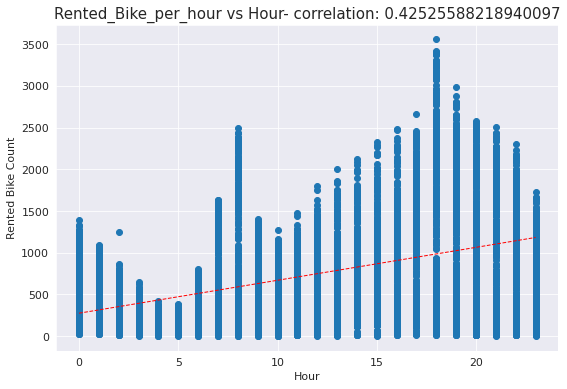

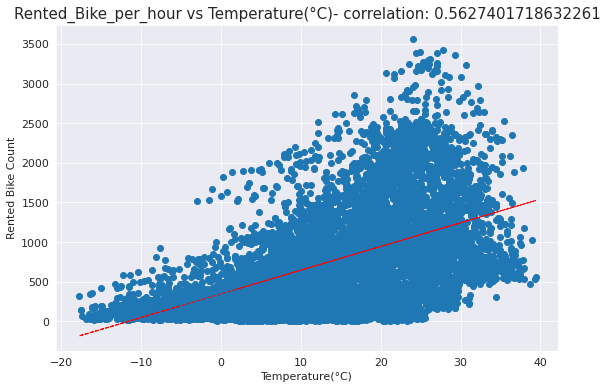

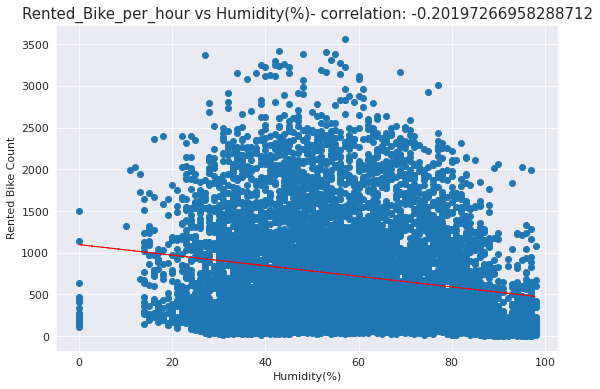

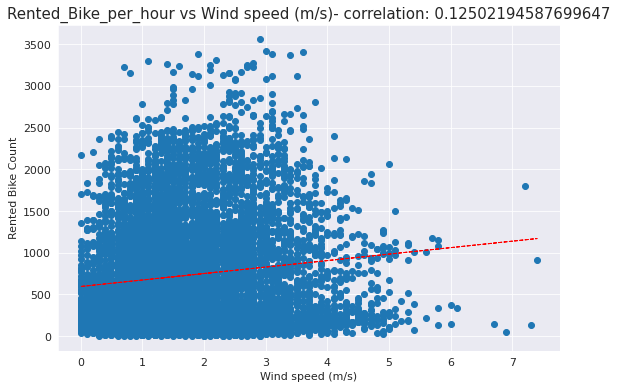

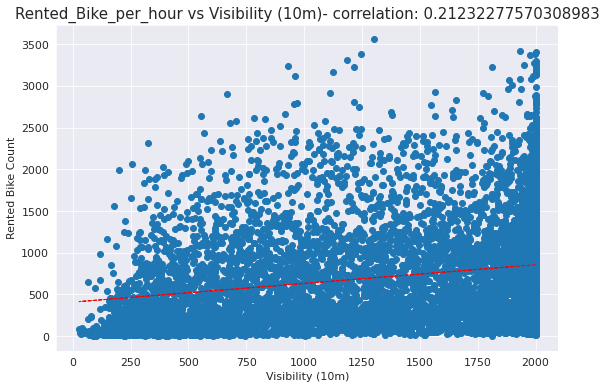

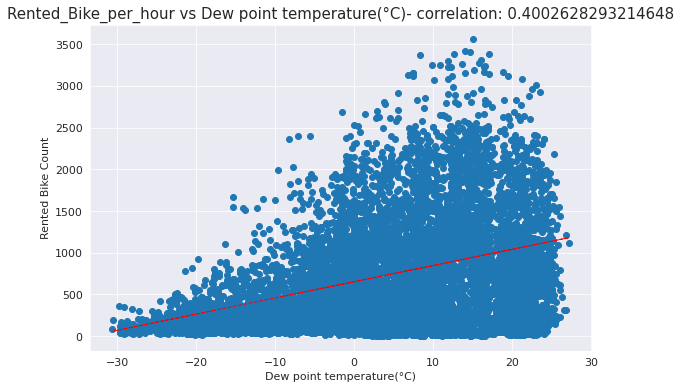

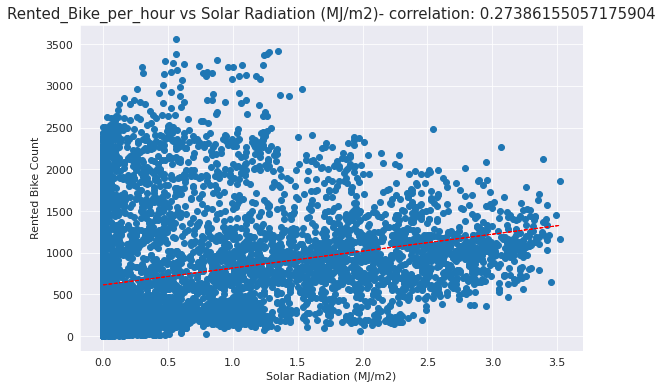

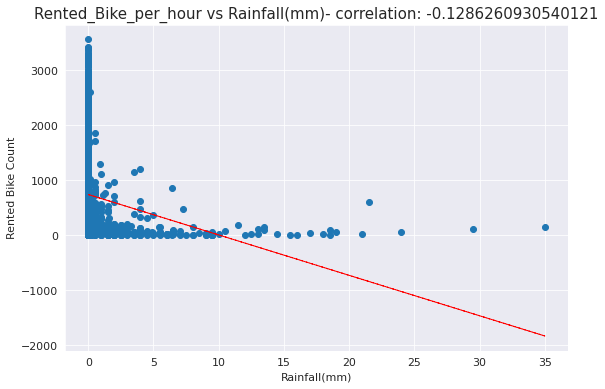

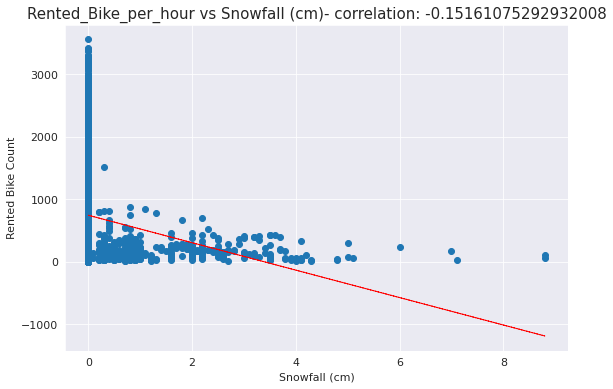

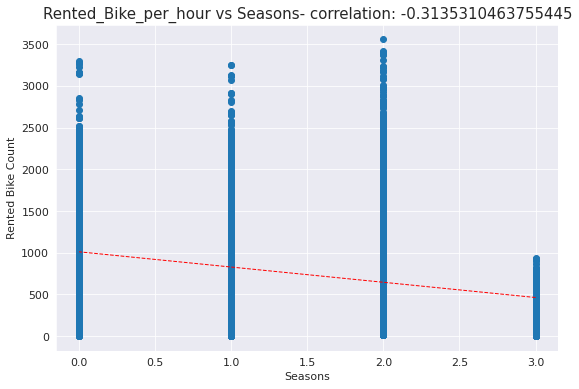

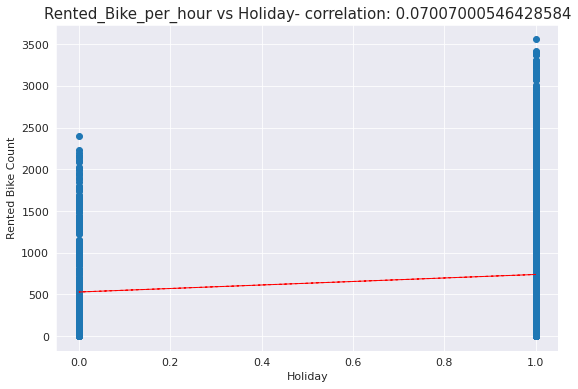

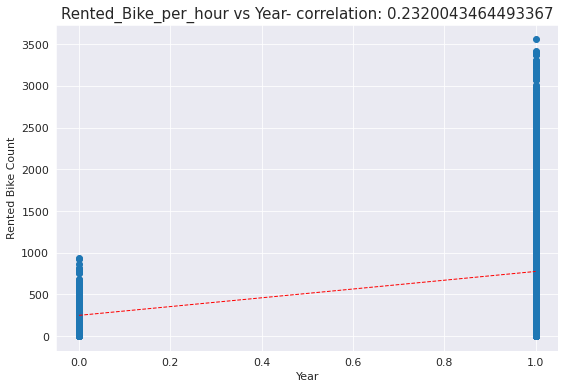

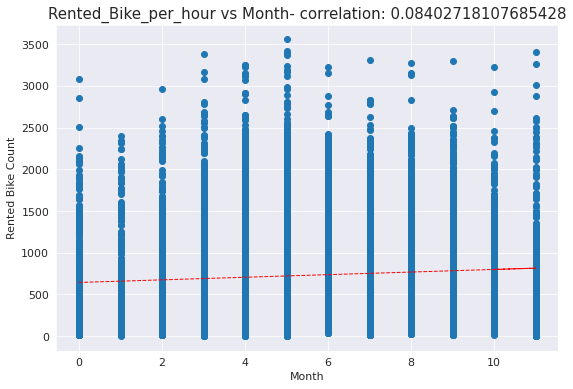

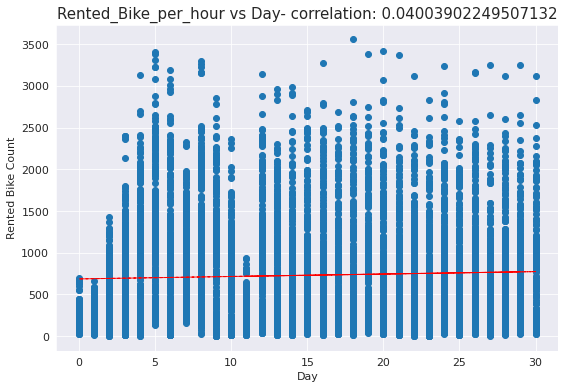

In [57]:
sns.set_style('darkgrid')
for col in numerical_columns:
    if col !=dependent_variable:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = df[col]
        label = df[dependent_variable]
        correlation = feature.corr(label)
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel(dependent_variable)
        ax.set_title('Rented_Bike_per_hour vs ' + col + '- correlation: ' + str(correlation))
        z = np.polyfit(df[col], df[dependent_variable], 1)
        y_hat = np.poly1d(z)(df[col])

        plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [58]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,0,0,11
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,0,0,11


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Seasons                    8465 non-null   int64  
 11  Holiday                    8465 non-null   int64  
 12  Year                       8465 non-null   int64  
 13  Month                      8465 non-null   int64

Applying Ordinary least Square to entire daset sense it is not realy a large data to check Y or Squareroot of Y which gives better results

In [60]:
X=df.drop(columns=['Rented Bike Count']).values
y=df['Rented Bike Count'].values

In [61]:
X.shape

(8465, 14)

In [62]:
import statsmodels.api as sm
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     714.5
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:11:04   Log-Likelihood:                -63432.
No. Observations:                8465   AIC:                         1.269e+05
Df Residuals:                    8450   BIC:                         1.270e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        891.4387    102.563      8.692      0.000     690.390    1092.487
x1            28.2490      0.744     37.962      0.000      26.790      29.708
x2            17.8977      3.679      4.864      0.000      10.685      25.110
x3           -11.5632      1.043    -11.087      0.000     -13.608      -9.519
x4            16.9698      5.197      3.265      0.001       6.782      27.158
x5             0.0152      0.010      1.529      0.126      -0.004       0.035
x6            13.2261      3.868      3.420      0.001       5.645      20.808
x7           -83.6195      7.755    -10.783      0.000     -98.820     -68.419
x8           -60.5863      4.378    -13.840      0.000     -69.167     -52.005
x9            35.4947     11.366      3.123      0.002      13.215      57.775
x10         -104.9535      5.294    -19.825      0.000    -115.331     -94.576
x11          133.4435     22.307      5.982      0.000      89.717     177.170
x12          -62.7547     22.011     -2.851      0.004    -105.901     -19.608
x13            2.5397      1.601      1.586      0.113      -0.599       5.678
x14           -1.0104      0.559     -1.808      0.071      -2.106       0.085
==============================================================================
Omnibus:                     1367.952   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2746.887
Skew:                           0.983   Prob(JB):                         0.00
Kurtosis:                       4.981   Cond. No.                     3.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
import statsmodels.api as sm
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(np.sqrt(y), X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     976.2
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:11:04   Log-Likelihood:                -28872.
No. Observations:                8465   AIC:                         5.777e+04
Df Residuals:                    8450   BIC:                         5.788e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4714      1.729     19.354      0.000      30.081      36.861
x1             0.5070      0.013     40.401      0.000       0.482       0.532
x2             0.1101      0.062      1.775      0.076      -0.011       0.232
x3            -0.2846      0.018    -16.182      0.000      -0.319      -0.250
x4             0.1022      0.088      1.166      0.244      -0.070       0.274
x5             0.0002      0.000      1.203      0.229      -0.000       0.001
x6             0.4898      0.065      7.511      0.000       0.362       0.618
x7            -0.7525      0.131     -5.755      0.000      -1.009      -0.496
x8            -1.5540      0.074    -21.052      0.000      -1.699      -1.409
x9             0.2222      0.192      1.159      0.246      -0.154       0.598
x10           -2.2688      0.089    -25.416      0.000      -2.444      -2.094
x11            3.2465      0.376      8.631      0.000       2.509       3.984
x12           -1.6629      0.371     -4.480      0.000      -2.390      -0.935
x13            0.0616      0.027      2.281      0.023       0.009       0.114
x14           -0.0049      0.009     -0.520      0.603      -0.023       0.014
==============================================================================
Omnibus:                      238.739   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.740
Skew:                           0.279   Prob(JB):                     8.50e-81
Kurtosis:                       3.856   Cond. No.                     3.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

SO we can use Square root of Y as our dependent variable

Base Line Model - Linear regression

In [64]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6772, 15)
(1693, 15)


In [65]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [66]:
y_pred = reg.predict(X_test)

In [67]:
reg.score(X_train, y_train)

0.5449799318897979

In [68]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error

In [69]:
MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error(y_test, y_pred)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

MAE : 320.1425250779566
RMSE : 430.73446200950184
R2 : 0.5279326266715767


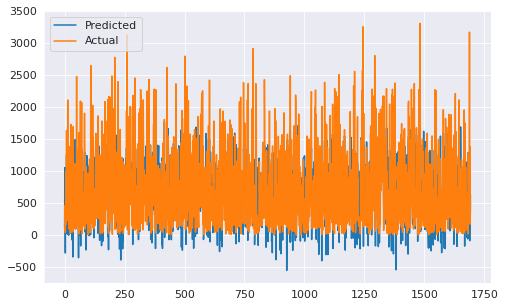

In [70]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

This R_squared is very low we can now Try scaling X and applying Squareroot on y to Make it close to normal distribution/

In [71]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [72]:
y=np.sqrt(y)

In [73]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 

In [74]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [75]:
y_pred = reg.predict(X_test)

In [76]:
MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error(y_test, y_pred)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

MAE : 5.592336640759783
RMSE : 7.431430471947076
R2 : 0.5996227959113041


In [77]:
y_pred1=y_pred = reg.predict(X_train)
MAE  = mean_absolute_error(y_train,y_pred1)
MSE  = mean_squared_error(y_train, y_pred1)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred1)
print("R2 :" ,r2)

MAE : 5.565416673880404
RMSE : 7.306397447588402
R2 : 0.621942792093618


By aPPlying Square Root we are performing better, but results are still not satisfactory , we need to do feature Engineering